In [1]:
#Import data packages
import numpy as np
import pandas as pd

#Import audio packages
import librosa
import librosa.display
from scipy.io import wavfile
import scipy.io.wavfile
import sys

#Import plotting packages
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import matplotlib.pyplot as plt
import seaborn as sns

#Import Keras & Tensorflow packages
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [2]:
final_dataframe = pd.read_csv('data/diff_final_data.csv',index_col=0)

In [3]:
final_dataframe

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,emotion
0,40.755844,3998.540771,0.016281,-494.695129,21.106981,-14.390797,-8.524015,-17.840214,-15.993177,-9.437501,...,15.505001,11.635184,8.597304,6.602968,6.760071,12.745721,19.217274,0.344926,0.349399,neutral
1,87.427071,3999.430176,0.024899,-403.938202,36.262287,-41.813370,5.657478,-27.468971,-16.871235,0.037341,...,6.164628,5.792684,4.838076,4.070064,5.289231,5.589336,6.913059,0.444162,0.319737,angry
2,38.043034,3995.927002,0.011388,-484.794891,62.422585,-11.896454,14.755815,7.944480,-13.963470,-7.956229,...,9.050076,7.524532,8.427584,8.299865,8.247096,7.541253,4.993912,0.393158,0.332756,sad
3,10.065931,3989.753174,0.005435,-577.055359,69.674881,-14.483016,14.063886,-2.686594,-3.753006,-15.049387,...,9.239218,9.124434,6.464316,9.620693,12.556333,14.276609,17.946737,0.379075,0.341756,calm
4,54.398445,3999.153076,0.007179,-563.696594,38.974346,-10.978131,-2.156035,-5.074760,-10.062261,-9.639794,...,7.758176,6.876032,6.716540,7.187038,5.511990,4.943897,4.870331,0.382393,0.352424,disgust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5247,3.279994,3886.642578,0.008712,-523.227356,98.282227,24.993261,1.426068,4.992365,5.870661,-4.103897,...,10.838665,9.931822,13.493686,18.375092,18.494427,19.303026,15.102575,0.249018,0.337536,neutral
5248,6.157344,3993.888916,0.028506,-374.418457,72.787247,11.771193,19.231989,2.808780,1.326450,-1.996125,...,7.711277,7.392266,11.471171,15.474387,19.060448,18.629265,18.505571,0.270754,0.318052,neutral
5249,2.153737,3542.910645,0.010828,-506.534454,110.276695,32.196453,39.890236,11.506146,0.194724,-2.213565,...,8.423018,9.692572,10.315808,11.501614,9.799644,7.944196,5.697847,0.242058,0.335333,neutral
5250,2.775037,1703.064819,0.015334,-483.341156,119.828064,30.630983,-8.823859,4.329844,-0.235005,-2.335994,...,16.352425,13.966016,11.487831,13.101591,15.659996,16.100912,12.642600,0.265564,0.333570,happy


# Dividing the data into test and train

In [4]:
#Split features from targets
X = final_dataframe.iloc[:,:-1]

#Split targets
y = final_dataframe.iloc[:,-1]

In [5]:
#Get sample of target
y

0       neutral
1         angry
2           sad
3          calm
4       disgust
         ...   
5247    neutral
5248    neutral
5249    neutral
5250      happy
5251      angry
Name: emotion, Length: 5252, dtype: object

In [6]:
#Get sample of features
X

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,40.755844,3998.540771,0.016281,-494.695129,21.106981,-14.390797,-8.524015,-17.840214,-15.993177,-9.437501,...,10.724360,15.505001,11.635184,8.597304,6.602968,6.760071,12.745721,19.217274,0.344926,0.349399
1,87.427071,3999.430176,0.024899,-403.938202,36.262287,-41.813370,5.657478,-27.468971,-16.871235,0.037341,...,5.430882,6.164628,5.792684,4.838076,4.070064,5.289231,5.589336,6.913059,0.444162,0.319737
2,38.043034,3995.927002,0.011388,-484.794891,62.422585,-11.896454,14.755815,7.944480,-13.963470,-7.956229,...,8.324203,9.050076,7.524532,8.427584,8.299865,8.247096,7.541253,4.993912,0.393158,0.332756
3,10.065931,3989.753174,0.005435,-577.055359,69.674881,-14.483016,14.063886,-2.686594,-3.753006,-15.049387,...,15.585936,9.239218,9.124434,6.464316,9.620693,12.556333,14.276609,17.946737,0.379075,0.341756
4,54.398445,3999.153076,0.007179,-563.696594,38.974346,-10.978131,-2.156035,-5.074760,-10.062261,-9.639794,...,6.717798,7.758176,6.876032,6.716540,7.187038,5.511990,4.943897,4.870331,0.382393,0.352424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5247,3.279994,3886.642578,0.008712,-523.227356,98.282227,24.993261,1.426068,4.992365,5.870661,-4.103897,...,10.787474,10.838665,9.931822,13.493686,18.375092,18.494427,19.303026,15.102575,0.249018,0.337536
5248,6.157344,3993.888916,0.028506,-374.418457,72.787247,11.771193,19.231989,2.808780,1.326450,-1.996125,...,10.319974,7.711277,7.392266,11.471171,15.474387,19.060448,18.629265,18.505571,0.270754,0.318052
5249,2.153737,3542.910645,0.010828,-506.534454,110.276695,32.196453,39.890236,11.506146,0.194724,-2.213565,...,5.219949,8.423018,9.692572,10.315808,11.501614,9.799644,7.944196,5.697847,0.242058,0.335333
5250,2.775037,1703.064819,0.015334,-483.341156,119.828064,30.630983,-8.823859,4.329844,-0.235005,-2.335994,...,17.149946,16.352425,13.966016,11.487831,13.101591,15.659996,16.100912,12.642600,0.265564,0.333570


In [7]:
from sklearn.model_selection import train_test_split

#Split train & test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Check out the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (4201, 85)
y_train shape: (4201,)
X_test shape: (1051, 85)
y_test shape: (1051,)


In [8]:
#Check unique values for y_test
y_test.unique()

array(['disgust', 'happy', 'fear', 'angry', 'neutral', 'surprised', 'sad',
       'calm'], dtype=object)

In [9]:
#Check unique values for y_train
y_train.unique()

array(['fear', 'neutral', 'happy', 'angry', 'disgust', 'sad', 'surprised',
       'calm'], dtype=object)

In [10]:
y_train.value_counts()

happy        628
fear         615
angry        605
sad          597
surprised    495
disgust      492
neutral      476
calm         293
Name: emotion, dtype: int64

In [11]:
y_test.value_counts()

sad          179
angry        171
fear         161
happy        148
neutral      112
disgust      100
surprised     97
calm          83
Name: emotion, dtype: int64

In [12]:
y_train

2781         fear
891       neutral
273         happy
1300        angry
3936      disgust
          ...    
905       disgust
5192    surprised
3980          sad
235     surprised
5157        happy
Name: emotion, Length: 4201, dtype: object

In [13]:
y_test

4         disgust
3251        happy
440          fear
1413        happy
4353      disgust
          ...    
2907        angry
759         angry
1042    surprised
3570        happy
3376         fear
Name: emotion, Length: 1051, dtype: object

In [14]:
labels = {'neutral':0, 'calm':1, 'happy':2, 'sad':3, 'angry':4, 'fear':5, 'disgust':6, 'surprised':7}

In [15]:
y_train_lb = y_train.map(labels)
y_test_lb = y_test.map(labels)

In [16]:
y_train_lb

2781    5
891     0
273     2
1300    4
3936    6
       ..
905     6
5192    7
3980    3
235     7
5157    2
Name: emotion, Length: 4201, dtype: int64

In [17]:
y_test_lb

4       6
3251    2
440     5
1413    2
4353    6
       ..
2907    4
759     4
1042    7
3570    2
3376    5
Name: emotion, Length: 1051, dtype: int64

In [18]:
#Label Encoding
from keras.utils import np_utils

#Encode emotion labels into numbers
y_train_lb = np_utils.to_categorical(y_train_lb)
y_test_lb = np_utils.to_categorical(y_test_lb)

# Check out the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train_lb.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test_lb.shape}')

X_train shape: (4201, 85)
y_train shape: (4201, 8)
X_test shape: (1051, 85)
y_test shape: (1051, 8)


In [19]:
#Check encoding
np.unique(y_train_lb, axis=0)

array([[0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
# range of x values
print(f'X range: {X_train.min()}-{X_train.max()}')
# y unique values
print(f'y values: {np.unique(y_train_lb)}')
num_classes = len(np.unique(y_train_lb))
print(f'Number of classes: {num_classes}')

X range: 0        0.911018
1     1389.903320
2        0.000282
3     -816.602051
4       -5.577060
         ...     
80       2.366203
81       3.125728
82       2.477994
83       0.160005
84       0.270680
Length: 85, dtype: float64-0      100.814598
1     3999.792480
2        0.099422
3     -207.591217
4      145.040070
         ...     
80      24.335955
81      23.843487
82      25.133421
83       0.616626
84       0.390491
Length: 85, dtype: float64
y values: [0. 1.]
Number of classes: 2


## Build list of labels to build confusion matrix after model

In [21]:
#Check encoding labels
labels

{'neutral': 0,
 'calm': 1,
 'happy': 2,
 'sad': 3,
 'angry': 4,
 'fear': 5,
 'disgust': 6,
 'surprised': 7}

In [22]:
#Build new lists of encoding labels
y_labels_encoded = {}
for i, label in enumerate(labels):
    y_labels_encoded[i] = label
    
y_labels_encoded

{0: 'neutral',
 1: 'calm',
 2: 'happy',
 3: 'sad',
 4: 'angry',
 5: 'fear',
 6: 'disgust',
 7: 'surprised'}

# Scale data for analysis

In [23]:
from sklearn.preprocessing import StandardScaler
#Normalize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scalled = scaler.transform(X_train)
X_test_scalled = scaler.transform(X_test)

In [24]:
import pickle
with open('meta/diff_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Build Model - Random Forest

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
#fitting the DT
DT_model_one = DecisionTreeClassifier()
DT_model_one.fit(X_train, y_train_lb)

#Getting the score
print(f"The training classification accuracy is: {DT_model_one.score(X_train, y_train_lb)}")
print(f"The validation classification accuracy is: {DT_model_one.score(X_test, y_test_lb)}")

The training classification accuracy is: 1.0
The validation classification accuracy is: 0.7078972407231209


# Build model - Convolution Neural Network

### Change dimensions for CNN model

In [27]:
#Add dimension for CNN
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

#Check shapes of dataframes
print(x_traincnn.shape)
print(x_testcnn.shape)

(4201, 85, 1)
(1051, 85, 1)


In [28]:
#Import packages for CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Conv1D 
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, BatchNormalization, Flatten, MaxPooling1D

In [67]:
#Build sequential CNN
CNN_model = Sequential()

In [68]:
#Build first layer
CNN_model.add(Conv1D(16, 5,padding='same', input_shape=(85, 1), activation='relu'))

In [69]:
#Build second layer
CNN_model.add(Conv1D(32, 5,padding='same',activation='relu'))
#CNN_model.add(MaxPooling1D(pool_size=(4)))

In [70]:
#Build third layer
CNN_model.add(Conv1D(64, 5,padding='same',activation='relu'))

In [71]:
#Build forth layer
CNN_model.add(Conv1D(128, 5,padding='same',activation='relu'))
#CNN_model.add(MaxPooling1D(pool_size=(4)))

In [72]:
#Add dropout
CNN_model.add(Dropout(0.1))

#Flatten 
CNN_model.add(Flatten())

In [73]:
CNN_model.add(Dense(128, activation ='relu'))
CNN_model.add(Dropout(0.1))
CNN_model.add(Dense(64, activation ='relu'))
CNN_model.add(Dense(8, activation='softmax'))

In [74]:
#Look at CNN model summary
CNN_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 85, 16)            96        
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 85, 32)            2592      
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 85, 64)            10304     
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 85, 128)           41088     
_________________________________________________________________
dropout_6 (Dropout)          (None, 85, 128)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 10880)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)              

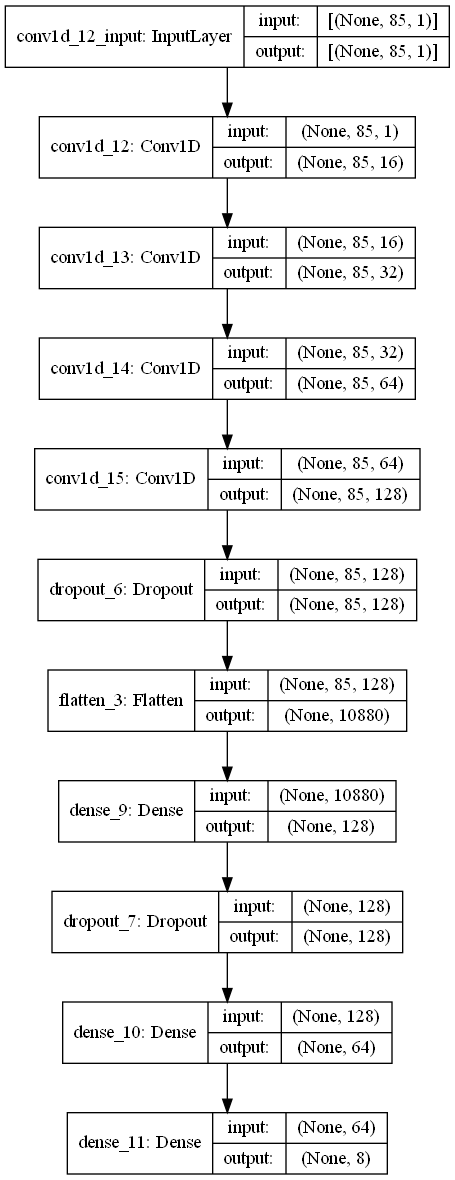

In [75]:
from tensorflow.keras.utils import plot_model

# Save an image of the model's architecture to a file
plot_model(CNN_model, to_file='diff_Feed Forward NN.png', show_shapes=True, show_layer_names=True)

In [76]:
from tensorflow.keras.optimizers import RMSprop

In [77]:
# Compile the model with the desired loss function, optimizer, and metric to optimize
CNN_model.compile(loss = 'categorical_crossentropy',
                  optimizer = RMSprop(learning_rate=0.00005, rho=0.9, epsilon=1e-07, decay=0.0),
                  metrics = ['accuracy'])

In [78]:
from keras.callbacks import ModelCheckpoint 

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)

#Model fit
cnn_results = CNN_model.fit(x_traincnn, y_train_lb,
              batch_size = 64,
              epochs = 200,
              verbose = 1,
              validation_data = (x_testcnn, y_test_lb))

Epoch 1/200
66/66 [==============================] - 2s 11ms/step - loss: 6.4461 - accuracy: 0.1438 - val_loss: 2.3546 - val_accuracy: 0.1855
Epoch 2/200
66/66 [==============================] - 0s 6ms/step - loss: 2.6921 - accuracy: 0.1595 - val_loss: 2.1194 - val_accuracy: 0.2150
Epoch 3/200
66/66 [==============================] - 0s 6ms/step - loss: 2.1465 - accuracy: 0.1819 - val_loss: 1.9549 - val_accuracy: 0.2103
Epoch 4/200
66/66 [==============================] - 0s 5ms/step - loss: 2.0361 - accuracy: 0.2016 - val_loss: 1.8649 - val_accuracy: 0.2883
Epoch 5/200
66/66 [==============================] - 0s 6ms/step - loss: 1.9438 - accuracy: 0.2528 - val_loss: 1.7358 - val_accuracy: 0.3216
Epoch 6/200
66/66 [==============================] - 0s 5ms/step - loss: 1.8453 - accuracy: 0.3004 - val_loss: 1.6084 - val_accuracy: 0.3939
Epoch 7/200
66/66 [==============================] - 0s 6ms/step - loss: 1.7138 - accuracy: 0.3368 - val_loss: 1.4534 - val_accuracy: 0.4215
Epoch 8/200


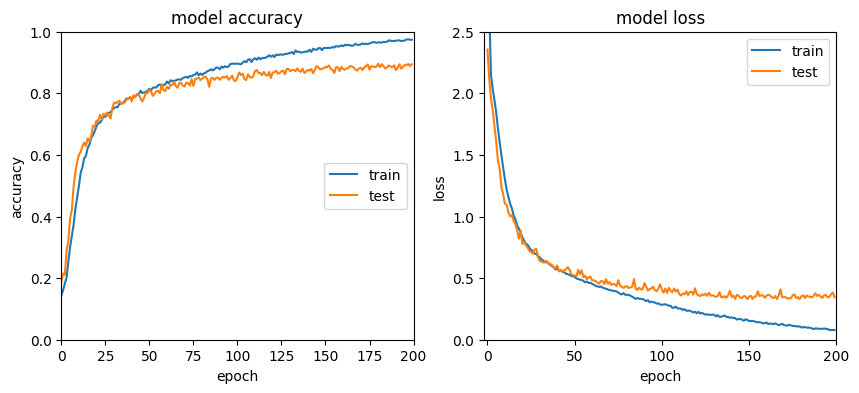

In [79]:
#Plot model accuracy over ephocs
fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].plot(cnn_results.history['accuracy'])
ax[0].plot(cnn_results.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].set_xlim(0,200)
ax[0].set_ylim(0,1)
ax[0].legend(['train', 'test'], loc='center right')

ax[1].plot(cnn_results.history['loss'])
ax[1].plot(cnn_results.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].set_xlim(-2,200)
ax[1].set_ylim(0,2.5)
ax[1].legend(['train', 'test'], loc='upper right')
plt.savefig('images/diff_model_cnn_acc.png',dpi=200)
plt.show()

In [80]:
# Calculate pre-training accuracy 
score = CNN_model.evaluate(x_testcnn, y_test_lb, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

33/33 [==============================] - 0s 2ms/step - loss: 0.3449 - accuracy: 0.8944
Pre-training accuracy: 89.4386%


In [81]:
# Evaluating the model on the training and testing set
score = CNN_model.evaluate(x_traincnn, y_train_lb, verbose=0)
print("Training Accuracy: ", round(score[1]*100,2))

score = CNN_model.evaluate(x_testcnn, y_test_lb, verbose=0)
print("Testing Accuracy: ", round(score[1]*100,2))

Training Accuracy:  99.67
Testing Accuracy:  89.44


# Add Confusion Matrix

In [82]:
#Get predictions from model
y_test_predictions = np.argmax(CNN_model.predict(x_testcnn), axis=-1)
y_test_predictions

array([6, 7, 5, ..., 7, 2, 5], dtype=int64)

In [83]:
y_test_predictions

array([6, 7, 5, ..., 7, 2, 5], dtype=int64)

In [84]:
y_test

4         disgust
3251        happy
440          fear
1413        happy
4353      disgust
          ...    
2907        angry
759         angry
1042    surprised
3570        happy
3376         fear
Name: emotion, Length: 1051, dtype: object

In [85]:
#Get labels for emotions
y_labels_encoded

{0: 'neutral',
 1: 'calm',
 2: 'happy',
 3: 'sad',
 4: 'angry',
 5: 'fear',
 6: 'disgust',
 7: 'surprised'}

In [86]:
# Change predictions to emotions in order to compare
y_test_predictions_labels =[]

#Go through each prediction and append to new list
for e in range(len(y_test_predictions)):
    y_test_predictions_labels.append(y_labels_encoded[y_test_predictions[e]])
    
#Build array of predictions
y_test_predictions_labels = np.array(y_test_predictions_labels,dtype='object')
y_test_predictions_labels

array(['disgust', 'surprised', 'fear', ..., 'surprised', 'happy', 'fear'],
      dtype=object)

In [87]:
from sklearn.metrics import confusion_matrix

#Build confusion matrix and see results
confusion_matrix = confusion_matrix(y_test, y_test_predictions_labels)
confusion_matrix

array([[159,   1,   4,   0,   2,   0,   3,   2],
       [  0,  74,   0,   1,   0,   4,   4,   0],
       [  2,   0,  83,   2,   2,   1,   6,   4],
       [  3,   1,   0, 143,   2,   0,  12,   0],
       [  2,   5,   0,   2, 132,   1,   1,   5],
       [  0,   4,   0,   1,   1,  99,   7,   0],
       [  1,   3,   2,   7,   4,   0, 161,   1],
       [  0,   0,   1,   1,   5,   0,   1,  89]], dtype=int64)

In [88]:
#See confusion matrix shape
confusion_matrix.shape

(8, 8)

In [89]:
#Turn all correct answers into 0 to visualize errors better
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        if i == j:
            confusion_matrix[i,j] = 0

# See results
confusion_matrix

array([[ 0,  1,  4,  0,  2,  0,  3,  2],
       [ 0,  0,  0,  1,  0,  4,  4,  0],
       [ 2,  0,  0,  2,  2,  1,  6,  4],
       [ 3,  1,  0,  0,  2,  0, 12,  0],
       [ 2,  5,  0,  2,  0,  1,  1,  5],
       [ 0,  4,  0,  1,  1,  0,  7,  0],
       [ 1,  3,  2,  7,  4,  0,  0,  1],
       [ 0,  0,  1,  1,  5,  0,  1,  0]], dtype=int64)

In [90]:
#Add labels to confusion matrix
confusion_matrix = pd.DataFrame(confusion_matrix, columns=list(y_labels_encoded.values()), index=list(y_labels_encoded.values()))

print("The rows represents the true values or observations")
print("The columns respresent the model's predictions")

#Print confusion matrix results
confusion_matrix

The rows represents the true values or observations
The columns respresent the model's predictions


,neutral,calm,happy,sad,angry,fear,disgust,surprised
neutral,0,1,4,0,2,0,3,2
calm,0,0,0,1,0,4,4,0
happy,2,0,0,2,2,1,6,4
sad,3,1,0,0,2,0,12,0
angry,2,5,0,2,0,1,1,5
fear,0,4,0,1,1,0,7,0
disgust,1,3,2,7,4,0,0,1
surprised,0,0,1,1,5,0,1,0


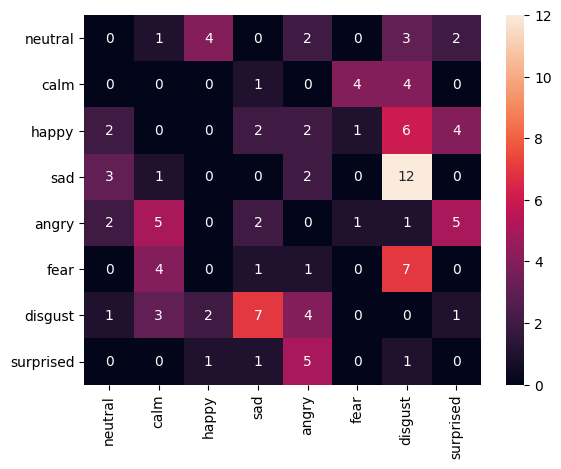

In [91]:
#Plot confusion matrix with results
ax = sns.heatmap(confusion_matrix, annot=True)
plt.savefig('diff_confusion_matrix.png',dpi=200)

# Save CNN Model

In [92]:
from keras.models import model_from_json
# serialize model to json
json_model = CNN_model.to_json()
#save the model architecture to JSON file
with open('models/diff_final_model.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
CNN_model.save_weights('models/diff_final_model.h5')
#Model loss and accuracy
print("Saved model to disk")

Saved model to disk


# Thats all for training

In [93]:
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)

#Model fit
cnn_results = CNN_model.fit(x_testcnn, y_test_lb,
              batch_size = 64,
              epochs = 200,
              verbose = 1
                )

Epoch 1/200
17/17 [==============================] - 1s 30ms/step - loss: 0.4037 - accuracy: 0.8677
Epoch 2/200
17/17 [==============================] - 0s 5ms/step - loss: 0.3607 - accuracy: 0.8716
Epoch 3/200
17/17 [==============================] - 0s 5ms/step - loss: 0.3423 - accuracy: 0.8792
Epoch 4/200
17/17 [==============================] - 0s 4ms/step - loss: 0.2921 - accuracy: 0.8991
Epoch 5/200
17/17 [==============================] - 0s 5ms/step - loss: 0.3013 - accuracy: 0.8934
Epoch 6/200
17/17 [==============================] - 0s 5ms/step - loss: 0.2813 - accuracy: 0.9001
Epoch 7/200
17/17 [==============================] - 0s 5ms/step - loss: 0.2778 - accuracy: 0.9001
Epoch 8/200
17/17 [==============================] - 0s 5ms/step - loss: 0.2493 - accuracy: 0.9058
Epoch 9/200
17/17 [==============================] - 0s 5ms/step - loss: 0.2705 - accuracy: 0.9039
Epoch 10/200
17/17 [==============================] - 0s 5ms/step - loss: 0.2480 - accuracy: 0.9125
Epoch 11

In [94]:
from keras.models import model_from_json
# serialize model to json
json_model = CNN_model.to_json()
#save the model architecture to JSON file
with open('models/diff_full_final_model.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
CNN_model.save_weights('models/diff_full_final_model.h5')
#Model loss and accuracy
print("Saved model to disk")

Saved model to disk
